<a href="https://colab.research.google.com/github/cvjeongwon/TensorFlow2/blob/main/11%2C_Callback_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Callback Function
- 특정상황에 대해 먼저 시스템에 등록
- 특정상황이 발생하면 시스템이 자동으로 실행해주는 함수
### TensorFlow 에서 Callback function 3가지에 대해 살펴봅니다.
1. 학습도중에 학습률을 변화시킬수 있다.
2. 학습도중에 일정시간이 지나도 validation data에 대한 loss값의 변화가 없다면 학습을 자동으로 멈추게 할 수 있다.
3. 모델의 가중치를 학습중에 중간중간에 저장할 수 있는 기능


In [1]:
import tensorflow as tf
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten, Dense

from keras.datasets import mnist

In [4]:
#1. train, test 데이터 로드
(x_train, t_train), (x_test, t_test) = mnist.load_data()
print('x_train.shape=', x_train.shape,', t_train.shape=', t_train.shape)
print('x_test.shape=', x_test.shape,', t_test.shape=', t_test.shape)

x_train.shape= (60000, 28, 28) , t_train.shape= (60000,)
x_test.shape= (10000, 28, 28) , t_test.shape= (10000,)


In [7]:
# 2. 데이터 전처리 : 정규화, 원핫인코딩
# x_train, x_test값 범위를 0~1사이로 정규화
x_train = x_train / 255.0 # 최대값을 이용
x_test = x_test /255.0

# one-hot-encoding
t_train = tf.keras.utils.to_categorical(t_train, num_classes= 10)
t_test =  tf.keras.utils.to_categorical(t_test, num_classes= 10)

In [10]:
# 3. 모델 구축 : 모델생성 > 생성된 모델에 레이어 추가
model = Sequential()
# 3. 모델 구축 : 모델 생성 > 모델에 레이어 추가
model = Sequential() 
# 입력층에서는 28*28=784 , 2차원을 1차원  vector 변환
model.add(Flatten(input_shape=(28,28)))

# 은닉층에서는 node개수를 100
model.add(Dense(100, activation='relu'))

# 출력층에서는  정답의 갯수와 동일한 10 node,  활성화 함수='softmax'  
model.add(Dense(10, activation='softmax'))

In [ ]:
# 4. compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss ='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [17]:
# 5. fit()
#  Callback Function
# ModelCheckpoint가 실행되면 'saving model to' ./modelcheckpoint_test.h5
# Epoch 00012: 'early stopping' 
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
file_path = './modelcheckpoint_test.h5'
chekpoint = ModelCheckpoint(file_path, monitor='val_loss', save_best_only=True, mode='auto') # val_loss값이 개선되었을때 가장 best인 모델 가중치값 저장
stopping = EarlyStopping(monitor='val_loss', patience=3, verbose= 1) # 검증 손실(val_loss)이 3회 이상 개선되지 않을 경우 조기 종료하는 기능
reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose= 1) # epoch이 3회 동안 val_loss가 개선되지 않으면 factor=0.5이므로 현재 학습률의 1/2배 만클 학습률을 줄여서 실행
hist= model.fit(x_train, t_train, epochs = 30, validation_split=0.2, callbacks=[chekpoint, stopping, reduceLR])

Epoch 1/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1053 - accuracy: 0.9701 - val_loss: 0.1350 - val_accuracy: 0.9612 - lr: 0.0010
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1038 - accuracy: 0.9704 - val_loss: 0.1336 - val_accuracy: 0.9607 - lr: 0.0010
Epoch 3/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1019 - accuracy: 0.9707 - val_loss: 0.1343 - val_accuracy: 0.9614 - lr: 0.0010
Epoch 4/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1002 - accuracy: 0.9717 - val_loss: 0.1328 - val_accuracy: 0.9610 - lr: 0.0010
Epoch 5/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0987 - accuracy: 0.9717 - val_loss: 0.1313 - val_accuracy: 0.9613 - lr: 0.0010
Epoch 6/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0972 - accuracy: 0.9725 - val_loss: 0.1302 - val_accuracy: 0.9622 - lr: 0.0010
Epoch 7/30
1500/1500 [==============================] - 8s

In [18]:
# 6. test dataㅣ이용하여 정확도 검증
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9694


[0.10616449266672134, 0.9693999886512756]

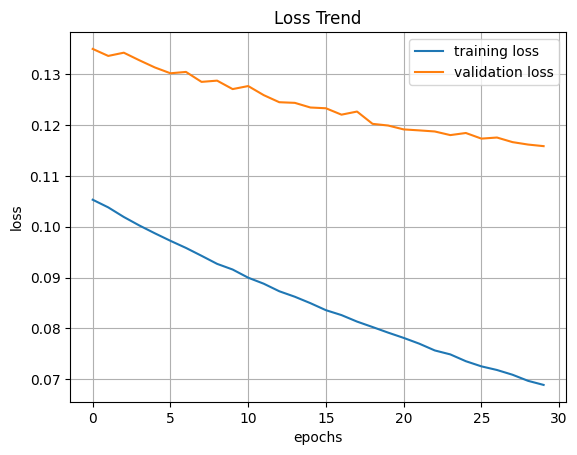

In [19]:
# 7. 손실함수 그래프
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

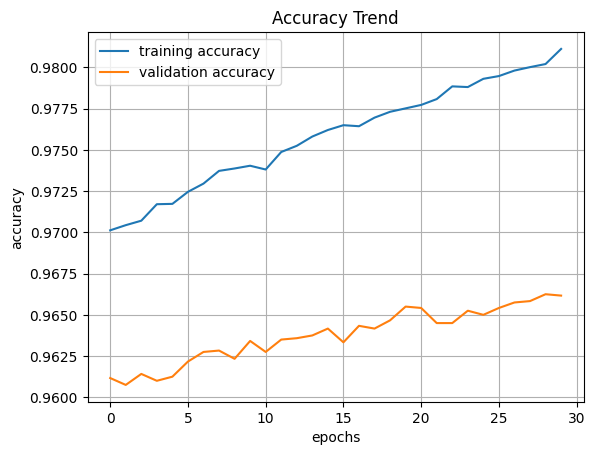

In [20]:
# 7. 정확도 함수 그래프
import matplotlib.pyplot as plt

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

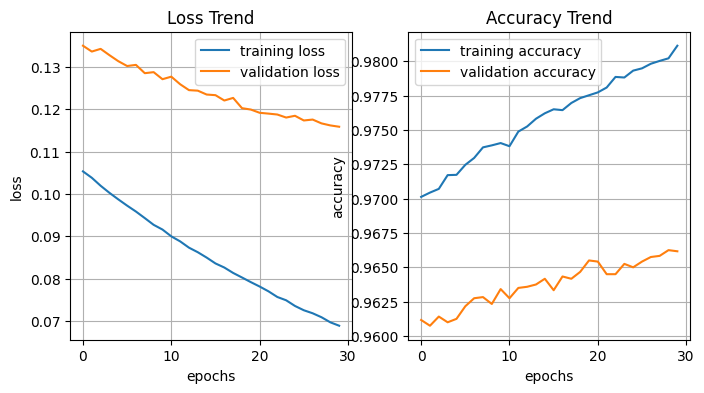

In [21]:
# 7. 손실 함수와 정확도 함수 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()